In [1]:
from pathlib import Path
import glob
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.lines import Line2D

import scienceplots


SINGLE_COL_WIDTH = 3.5
DOUBLE_COL_WIDTH = 7.16
DPI = 150

plt.style.use(["science", "ieee"])
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "text.usetex": False,
})

ref_style = {
    "linestyle": "--",
    "color": "black",
    "alpha": 0.7,
    "linewidth": 1.0,
    "label": "ED Reference",
}

main_style = {
    "linestyle": "-",
    "linewidth": 1.0,
    "alpha": 0.9,
    "marker": "o",
    "markersize": 3,
    "markeredgewidth": 0.0,
    "color": "#ff7f0e",         # blue: #1f77b4
}

print("Global styles defined.")

Global styles defined.


In [2]:
SUPPORT_GUIDE_LS = (0, (2.0, 3.0))
SUPPORT_GUIDE_LW = 0.85
SUPPORT_GUIDE_A  = 0.22
SUPPORT_GUIDE_C  = "0.22"


Saved: tfim_4x4_data_scaling.pdf


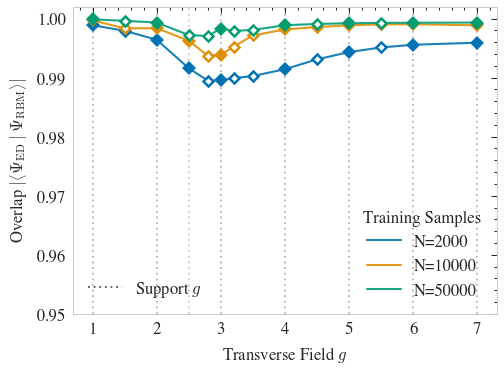

In [3]:
# =========================
# Cell 2 - Overlap vs g
# =========================
SAVE_FIG = True
FILENAME = "tfim_4x4_data_scaling.pdf"
COLUMN_MODE = "single"

XLIM = None
YLIM = (0.95, 1.002)
FIELD_SYMBOL = "g"

# --- markers (diamonds for all) ---
MARKER_SHAPE = "D"
MARKER_SIZE_SUPPORT = 4.6   # filled diamonds
MARKER_SIZE_NOVEL   = 3.3   # slightly larger so the *inner white* looks comparable in size
MARKER_EDGE_NOVEL   = 1.2

# --- support guide style (make slightly less intrusive) ---
SUPPORT_GUIDE_LS = (0, (1.2, 2.4))  # a bit finer than (2,2)
SUPPORT_GUIDE_LW = 0.75            # thinner
SUPPORT_GUIDE_A  = 0.16            # more transparent
SUPPORT_GUIDE_C  = "0.25"          # slightly lighter gray

# --- y ticks ---
Y_TICK_STEP = 0.01
Y_TICK_FMT  = "%.2f"

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75

fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)

exp_dir = Path(".")
report_files = sorted(exp_dir.glob("*_report.json"))
if not report_files:
    raise FileNotFoundError(f"No '*_report.json' files found in: {exp_dir.resolve()}")

experiments = []
for fpath in report_files:
    with open(fpath, "r") as f:
        experiments.append(json.load(f))
experiments.sort(key=lambda x: x.get("config", {}).get("n_samples", np.inf))

# ----------------------------------------------------------
# Seaborn "colorblind" palette (fallback if seaborn missing)
# ----------------------------------------------------------
n_colors = max(10, len(experiments))

import seaborn as sns
_palette = sns.color_palette("colorblind", n_colors=n_colors)  # RGB tuples
colors = list(_palette)

for i, exp in enumerate(experiments):
    n = exp["config"]["n_samples"]
    df = pd.DataFrame(exp["results"])
    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]
    color = colors[i % len(colors)]

    # main trend line (goes into the "Training Samples" legend)
    ax.plot(
        df["h"], df["overlap"],
        color=color,
        label=f"N={n}",
        linestyle=main_style.get("linestyle", "-"),
        linewidth=main_style.get("linewidth", 1.0),
        alpha=main_style.get("alpha", 0.5),
    )

    # support: FILLED diamonds + dotted vertical guides
    ax.plot(
        supp["h"], supp["overlap"],
        linestyle="None", marker=MARKER_SHAPE,
        markersize=MARKER_SIZE_SUPPORT,
        color=color, markerfacecolor=color, markeredgewidth=0.0,
    )
    for g0 in supp["h"].values:
        ax.axvline(
            g0,
            linestyle=SUPPORT_GUIDE_LS,
            linewidth=SUPPORT_GUIDE_LW,
            alpha=SUPPORT_GUIDE_A,
            color=SUPPORT_GUIDE_C,
            zorder=0,
            label="_nolegend_"
        )

    # novel: OPEN diamonds
    ax.plot(
        nov["h"], nov["overlap"],
        linestyle="None", marker=MARKER_SHAPE,
        markersize=MARKER_SIZE_NOVEL, color=color,
        markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
    )

ax.set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")
ax.set_ylabel(r"Overlap $\left|\left\langle \Psi_\mathrm{ED}\mid \Psi_\mathrm{RBM}\right\rangle\right|$")

if XLIM is not None:
    ax.set_xlim(*XLIM)
if YLIM is not None:
    ax.set_ylim(*YLIM)

ax.yaxis.set_major_locator(mticker.MultipleLocator(Y_TICK_STEP))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter(Y_TICK_FMT))

# Right legend: ONLY training samples
leg_samples = ax.legend(loc="lower right", title="Training Samples", frameon=False)

# Left legend: ONLY dotted support-g guide
custom_lines = [
    Line2D([0], [0], color=SUPPORT_GUIDE_C, linestyle=SUPPORT_GUIDE_LS,
           linewidth=SUPPORT_GUIDE_LW, label=r"Support $g$")
]
leg_guides = ax.legend(handles=custom_lines, loc="lower left", frameon=False)
ax.add_artist(leg_samples)

ax.grid(False)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()


In [4]:
# --- Load Data Plot 1 ---
file_path = Path("tfim_4x4_suscept_rbm_mc_20251216_010908.csv")
ref_file = Path("tfim_4x4_suscept_ref.csv")

if file_path.exists():
    df = pd.read_csv(file_path)
    h_eval = df["h"].values
    chi_values = df["chi_F"].values
else:
    # Dummy data
    h_eval = np.linspace(1, 4, 20)
    chi_values = np.exp(-(h_eval-2.5)**2)

ref_df = pd.read_csv(ref_file) if ref_file.exists() else None
XLIM = (0.95, 4.05)
print("Data for Plot 1 loaded.")

Data for Plot 1 loaded.


Saved: tfim_4x4_susceptibility_narrow.pdf


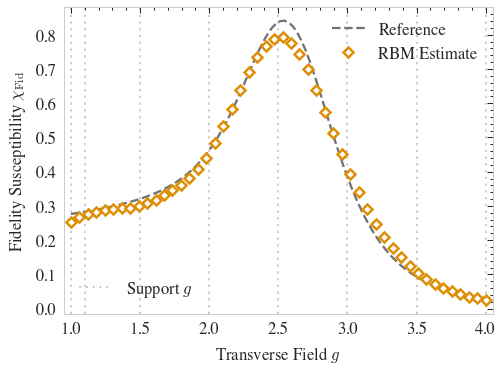

In [5]:
from matplotlib.lines import Line2D

# --- Configuration ---
SAVE_FIG = True
FILENAME = "tfim_4x4_susceptibility_narrow.pdf"
COLUMN_MODE = "single"

support_lines = [1.00, 1.10, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00]

# --- marker style (open diamond) ---
MARKER_SHAPE = "D"
MARKER_SIZE  = 3.3
MARKER_EDGE  = 1.2

# --- main color: FIRST from seaborn "colorblind" palette ---
try:
    import seaborn as sns
    MAIN_COLOR = sns.color_palette("colorblind", n_colors=10)[1]
except Exception:
    MAIN_COLOR = "#0173B2"  # fallback (seaborn colorblind blue)

# --- support guide style (tiny bit more visible, like magnetization update) ---
SUPPORT_GUIDE_LS = (0, (1.2, 2.4))
SUPPORT_GUIDE_LW = 0.90
SUPPORT_GUIDE_A  = 0.26
SUPPORT_GUIDE_C  = "0.20"

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75

fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)

# helps keep guides visible but still behind data
ax.patch.set_zorder(0)

# 1. Reference Curve (no ref_style dict)
if ref_df is not None and len(ref_df) > 0:
    ax.plot(
        ref_df["h"].values,
        ref_df["chi_F"].values,
        linestyle="--",
        linewidth=1.1,
        color="0.45",
        label="Reference",
        zorder=1,
    )

# 2. RBM Estimate (markers only)
ax.plot(
    h_eval,
    chi_values,
    linestyle="None",
    marker=MARKER_SHAPE,
    markersize=MARKER_SIZE,
    color=MAIN_COLOR,
    markerfacecolor="white",
    markeredgewidth=MARKER_EDGE,
    label="RBM Estimate",
    zorder=2,
)

# 3. Support Lines (vertical guides)
for g0 in support_lines:
    ax.axvline(
        g0,
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        alpha=SUPPORT_GUIDE_A,
        color=SUPPORT_GUIDE_C,
        zorder=0.2,
        label="_nolegend_",
    )

ax.set_xlabel(r"Transverse Field $g$")
ax.set_ylabel(r"Fidelity Susceptibility $\chi_\mathrm{Fid}$")

if XLIM is not None:
    ax.set_xlim(*XLIM)

# --- split legends (support bottom-left) ---
leg_main = ax.legend(loc="upper right", frameon=False)

support_handle = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_GUIDE_A,
    label=r"Support $g$",
)
leg_support = ax.legend(handles=[support_handle], loc="lower left", frameon=False)
ax.add_artist(leg_main)

ax.grid(False)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()


In [6]:
SIDE_LENGTH = 4  # <- set this

base = f"tfim_{SIDE_LENGTH}x{SIDE_LENGTH}_magnetizations"
paths = {
    "full":       Path(f"{base}_full.csv"),
    "three_point":Path(f"{base}_three_point.csv"),
    "one_point":  Path(f"{base}_one_point.csv"),
    "ref":        Path(f"{base}_ref.csv"),
}

def _load_csv(p: Path) -> pd.DataFrame:
    if p.exists():
        return pd.read_csv(p)
    print(f"[warn] missing: {p}")
    return None

df_full  = _load_csv(paths["full"])
df_three = _load_csv(paths["three_point"])
df_one   = _load_csv(paths["one_point"])
ref_df   = _load_csv(paths["ref"])

Saved: tfim_4x4_magnetization.pdf


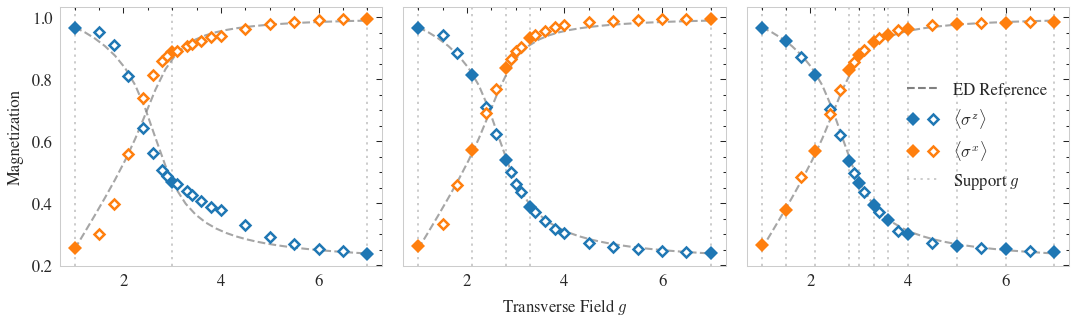

In [7]:
# =========================
# Cell B - Plot magnetizations (3 panels) [updated: dotted guides a touch stronger]
# =========================
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

SAVE_FIG     = True
FILENAME     = f"tfim_{SIDE_LENGTH}x{SIDE_LENGTH}_magnetization.pdf"
COLUMN_MODE  = "double"   # "single" or "double"
FIELD_SYMBOL = "g"

# --- Marker knobs (MATCH overlap-vs-g figure) ---
MARKER_SHAPE        = "D"
MARKER_SIZE_SUPPORT = 4.6
MARKER_SIZE_NOVEL   = 3.3
MARKER_EDGE_NOVEL   = 1.2

# --- support guide style (tiny bit more visible) ---
SUPPORT_GUIDE_LS = (0, (1.2, 2.4))
SUPPORT_GUIDE_LW = 0.90
SUPPORT_GUIDE_A  = 0.26
SUPPORT_GUIDE_C  = "0.20"

# tab10 palette
cmap = plt.get_cmap("tab10")
COLOR_Z = cmap(0)
COLOR_X = cmap(1)

# reference line style (grey dashed)
_ref_style = dict(ref_style)
_ref_style.pop("label", None)
_ref_style["color"] = "gray"

def _plot_panel(ax, df, ref_df):
    ax.patch.set_zorder(0)

    if df is None:
        ax.text(0.5, 0.5, "missing data file", ha="center", va="center", transform=ax.transAxes)
        ax.grid(False)
        return

    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]

    # Support guide lines (vertical, dotted) -- draw each support g once
    support_g = np.unique(supp["h"].to_numpy())
    for g0 in support_g:
        ax.axvline(
            g0,
            linestyle=SUPPORT_GUIDE_LS,
            linewidth=SUPPORT_GUIDE_LW,
            alpha=SUPPORT_GUIDE_A,
            color=SUPPORT_GUIDE_C,
            zorder=0.2,
            label="_nolegend_",
        )

    # Reference (ED)
    if ref_df is not None:
        ax.plot(ref_df["h"], ref_df["mag_z"], label="_nolegend_", zorder=1, **_ref_style)
        ax.plot(ref_df["h"], ref_df["mag_x"], label="_nolegend_", zorder=1, **_ref_style)

    # Support (filled diamonds)
    ax.plot(
        supp["h"], supp["mz"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_Z,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        supp["h"], supp["mx"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_X,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0,
        label="_nolegend_", zorder=2,
    )

    # Novel (open diamonds)
    ax.plot(
        nov["h"], nov["mz"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_Z,
        markersize=MARKER_SIZE_NOVEL,
        markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        nov["h"], nov["mx"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_X,
        markersize=MARKER_SIZE_NOVEL,
        markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )

    ax.grid(False)

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.3

fig, axes = plt.subplots(
    1, 3,
    figsize=(width, height),
    dpi=DPI,
    sharey=True,
    gridspec_kw={"wspace": 0.06},
    constrained_layout=True,
)

# order: one | three | full
_plot_panel(axes[0], df_one,   ref_df)
_plot_panel(axes[1], df_three, ref_df)
_plot_panel(axes[2], df_full,  ref_df)

axes[0].set_ylabel("Magnetization")

# x label only once (middle panel)
axes[0].set_xlabel("")
axes[2].set_xlabel("")
axes[1].set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")

# --- combined legend entries (in LAST panel) ---
ref_handle = Line2D(
    [0], [0],
    color=_ref_style.get("color", "gray"),
    linestyle=_ref_style.get("linestyle", "--"),
    linewidth=_ref_style.get("linewidth", 1.0),
)

mz_handle = (
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_Z, markerfacecolor=COLOR_Z, markeredgewidth=0.0,
           markersize=MARKER_SIZE_SUPPORT),
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_Z, markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
           markersize=MARKER_SIZE_NOVEL),
)

mx_handle = (
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_X, markerfacecolor=COLOR_X, markeredgewidth=0.0,
           markersize=MARKER_SIZE_SUPPORT),
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_X, markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
           markersize=MARKER_SIZE_NOVEL),
)

support_handle = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_GUIDE_A,
)

axes[2].legend(
    [ref_handle, mz_handle, mx_handle, support_handle],
    [ref_style.get("label", "ED Reference"),
     r'$\langle \sigma^z \rangle$',
     r'$\langle \sigma^x \rangle$',
     r"Support $g$"],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    loc="center right", bbox_to_anchor=(0.98, 0.50),
    frameon=False,
)

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()


Saved: tfim_4x4_magnetization.pdf


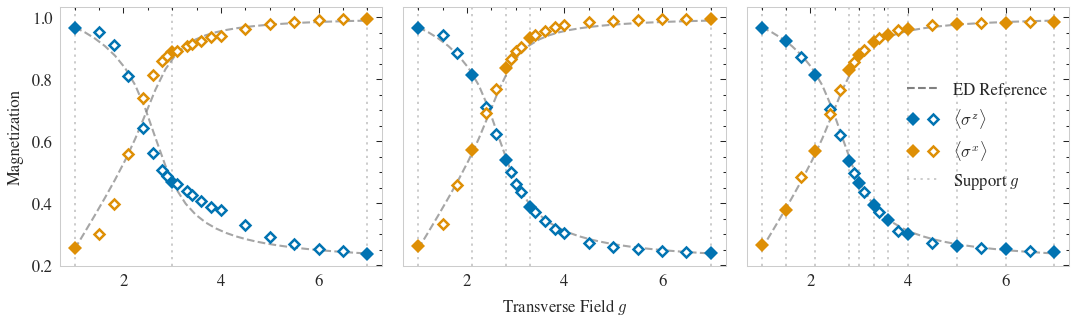

In [8]:
# =========================
# Cell B - Plot magnetizations (3 panels) [colorblind + no canvas color tweaks]
# =========================
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

SAVE_FIG     = True
FILENAME     = f"tfim_{SIDE_LENGTH}x{SIDE_LENGTH}_magnetization.pdf"
COLUMN_MODE  = "double"   # "single" or "double"
FIELD_SYMBOL = "g"

# --- Marker knobs (MATCH overlap-vs-g figure) ---
MARKER_SHAPE        = "D"
MARKER_SIZE_SUPPORT = 4.6
MARKER_SIZE_NOVEL   = 3.3
MARKER_EDGE_NOVEL   = 1.2

# --- support guide style (tiny bit more visible) ---
SUPPORT_GUIDE_LS = (0, (1.2, 2.4))
SUPPORT_GUIDE_LW = 0.90
SUPPORT_GUIDE_A  = 0.26
SUPPORT_GUIDE_C  = "0.20"

# --- seaborn colorblind palette (fallback if seaborn missing) ---
try:
    import seaborn as sns
    _pal = sns.color_palette("colorblind", n_colors=10)
    COLOR_Z = _pal[0]  # first
    COLOR_X = _pal[1]  # second
except Exception:
    COLOR_Z = "#0173B2"
    COLOR_X = "#DE8F05"

# reference line style (grey dashed)
_ref_style = dict(ref_style)
_ref_style.pop("label", None)
_ref_style["color"] = "gray"

def _plot_panel(ax, df, ref_df):
    # NOTE: no background/canvas tweaks here (no facecolor / patch zorder)

    if df is None:
        ax.text(0.5, 0.5, "missing data file", ha="center", va="center", transform=ax.transAxes)
        ax.grid(False)
        return

    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]

    # Support guide lines (vertical, dotted) -- draw each support g once
    support_g = np.unique(supp["h"].to_numpy())
    for g0 in support_g:
        ax.axvline(
            g0,
            linestyle=SUPPORT_GUIDE_LS,
            linewidth=SUPPORT_GUIDE_LW,
            alpha=SUPPORT_GUIDE_A,
            color=SUPPORT_GUIDE_C,
            zorder=0,
            label="_nolegend_",
        )

    # Reference (ED)
    if ref_df is not None:
        ax.plot(ref_df["h"], ref_df["mag_z"], label="_nolegend_", zorder=1, **_ref_style)
        ax.plot(ref_df["h"], ref_df["mag_x"], label="_nolegend_", zorder=1, **_ref_style)

    # Support (filled diamonds)
    ax.plot(
        supp["h"], supp["mz"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_Z,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        supp["h"], supp["mx"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_X,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0,
        label="_nolegend_", zorder=2,
    )

    # Novel (open diamonds)
    ax.plot(
        nov["h"], nov["mz"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_Z,
        markersize=MARKER_SIZE_NOVEL,
        markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        nov["h"], nov["mx"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_X,
        markersize=MARKER_SIZE_NOVEL,
        markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )

    ax.grid(False)

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.3

fig, axes = plt.subplots(
    1, 3,
    figsize=(width, height),
    dpi=DPI,
    sharey=True,
    gridspec_kw={"wspace": 0.06},
    constrained_layout=True,
)

# order: one | three | full
_plot_panel(axes[0], df_one,   ref_df)
_plot_panel(axes[1], df_three, ref_df)
_plot_panel(axes[2], df_full,  ref_df)

axes[0].set_ylabel("Magnetization")

# x label only once (middle panel)
axes[0].set_xlabel("")
axes[2].set_xlabel("")
axes[1].set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")

# --- combined legend entries (in LAST panel) ---
ref_handle = Line2D(
    [0], [0],
    color=_ref_style.get("color", "gray"),
    linestyle=_ref_style.get("linestyle", "--"),
    linewidth=_ref_style.get("linewidth", 1.0),
)

mz_handle = (
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_Z, markerfacecolor=COLOR_Z, markeredgewidth=0.0,
           markersize=MARKER_SIZE_SUPPORT),
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_Z, markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
           markersize=MARKER_SIZE_NOVEL),
)

mx_handle = (
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_X, markerfacecolor=COLOR_X, markeredgewidth=0.0,
           markersize=MARKER_SIZE_SUPPORT),
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_X, markerfacecolor="white", markeredgewidth=MARKER_EDGE_NOVEL,
           markersize=MARKER_SIZE_NOVEL),
)

support_handle = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_GUIDE_A,
)

axes[2].legend(
    [ref_handle, mz_handle, mx_handle, support_handle],
    [ref_style.get("label", "ED Reference"),
     r'$\langle \sigma^z \rangle$',
     r'$\langle \sigma^x \rangle$',
     r"Support $g$"],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    loc="center right", bbox_to_anchor=(0.98, 0.50),
    frameon=False,
)

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()

Saved: tfim_4x4_magnetization.pdf


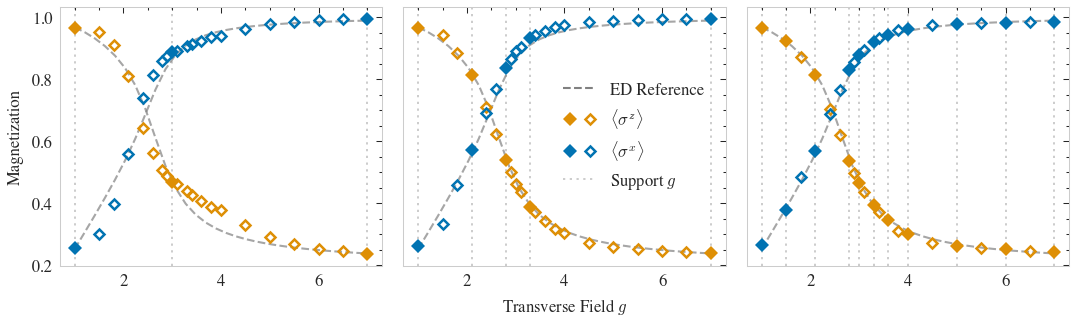

In [19]:
# =========================
# Cell B - Plot magnetizations (3 panels) [colorblind + hollow open markers + no canvas tweaks]
# =========================
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

SAVE_FIG     = True
FILENAME     = f"tfim_{SIDE_LENGTH}x{SIDE_LENGTH}_magnetization.pdf"
COLUMN_MODE  = "double"   # "single" or "double"
FIELD_SYMBOL = "g"

# --- Marker knobs (MATCH overlap-vs-g figure) ---
MARKER_SHAPE        = "D"
MARKER_SIZE_SUPPORT = 4.6
MARKER_SIZE_NOVEL   = 3.3
MARKER_EDGE_NOVEL   = 1.2

# --- support guide style (tiny bit more visible) ---
SUPPORT_GUIDE_LS = (0, (1.2, 2.4))
SUPPORT_GUIDE_LW = 0.90
SUPPORT_GUIDE_A  = 0.26
SUPPORT_GUIDE_C  = "0.20"

# --- seaborn colorblind palette (fallback if seaborn missing) ---

import seaborn as sns
_pal = sns.color_palette("colorblind", n_colors=10)
COLOR_Z = _pal[1]
COLOR_X = _pal[0]

# reference line style (grey dashed)
_ref_style = dict(ref_style)
_ref_style.pop("label", None)
_ref_style["color"] = "gray"

def _plot_panel(ax, df, ref_df):
    # NOTE: no fig/ax facecolor changes here

    if df is None:
        ax.text(0.5, 0.5, "missing data file", ha="center", va="center", transform=ax.transAxes)
        ax.grid(False)
        return

    supp = df[df["type"] == "support"]
    nov  = df[df["type"] == "novel"]

    # Support guide lines (vertical, dotted) -- draw each support g once
    support_g = np.unique(supp["h"].to_numpy())
    for g0 in support_g:
        ax.axvline(
            g0,
            linestyle=SUPPORT_GUIDE_LS,
            linewidth=SUPPORT_GUIDE_LW,
            alpha=SUPPORT_GUIDE_A,
            color=SUPPORT_GUIDE_C,
            zorder=0,
            label="_nolegend_",
        )

    # Reference (ED)
    if ref_df is not None:
        ax.plot(ref_df["h"], ref_df["mag_z"], label="_nolegend_", zorder=1, **_ref_style)
        ax.plot(ref_df["h"], ref_df["mag_x"], label="_nolegend_", zorder=1, **_ref_style)

    # Support (filled diamonds)
    ax.plot(
        supp["h"], supp["mz"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_Z,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        supp["h"], supp["mx"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_X,
        markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0,
        label="_nolegend_", zorder=2,
    )

    # Novel (open diamonds) -> truly hollow (no fill)
    ax.plot(
        nov["h"], nov["mz"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_Z,
        markersize=MARKER_SIZE_NOVEL,
        mfc="none", mew=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )
    ax.plot(
        nov["h"], nov["mx"],
        linestyle="None", marker=MARKER_SHAPE, color=COLOR_X,
        markersize=MARKER_SIZE_NOVEL,
        mfc="none", mew=MARKER_EDGE_NOVEL,
        label="_nolegend_", zorder=2,
    )

    ax.grid(False)

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.3

fig, axes = plt.subplots(
    1, 3,
    figsize=(width, height),
    dpi=DPI,
    sharey=True,
    gridspec_kw={"wspace": 0.06},
    constrained_layout=True,
)

# order: one | three | full
_plot_panel(axes[0], df_one,   ref_df)
_plot_panel(axes[1], df_three, ref_df)
_plot_panel(axes[2], df_full,  ref_df)

axes[0].set_ylabel("Magnetization")

# x label only once (middle panel)
axes[0].set_xlabel("")
axes[2].set_xlabel("")
axes[1].set_xlabel(rf"Transverse Field ${FIELD_SYMBOL}$")

# --- combined legend entries (in LAST panel) ---
ref_handle = Line2D(
    [0], [0],
    color=_ref_style.get("color", "gray"),
    linestyle=_ref_style.get("linestyle", "--"),
    linewidth=_ref_style.get("linewidth", 1.0),
)

mz_handle = (
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_Z, markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0),
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_Z, markersize=MARKER_SIZE_NOVEL, mfc="none", mew=MARKER_EDGE_NOVEL),
)

mx_handle = (
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_X, markersize=MARKER_SIZE_SUPPORT, markeredgewidth=0.0),
    Line2D([0], [0], marker=MARKER_SHAPE, linestyle="None",
           color=COLOR_X, markersize=MARKER_SIZE_NOVEL, mfc="none", mew=MARKER_EDGE_NOVEL),
)

support_handle = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_GUIDE_A,
)

axes[1].legend(
    [ref_handle, mz_handle, mx_handle, support_handle],
    [ref_style.get("label", "ED Reference"),
     r'$\langle \sigma^z \rangle$',
     r'$\langle \sigma^x \rangle$',
     r"Support $g$"],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    loc="center right", bbox_to_anchor=(0.98, 0.50),
    frameon=False,
)

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()

In [11]:
# --- Data Config ---
CHAIN_LENGTH = 16
DATA_FILE = Path("tfim_l16_entangle_rbm_20251212_030007.csv")
REF_FILE = Path(f"tfim_{CHAIN_LENGTH}_entropy_ref.csv")

# --- Load & Process ---
if DATA_FILE.exists():
    df_res = pd.read_csv(DATA_FILE)
    ref_df_2 = pd.read_csv(REF_FILE) if REF_FILE.exists() else pd.DataFrame()

    # Pivot for 3D Surface
    pivot_df = df_res.pivot(index="l", columns="h", values="s2")

    # Meshgrid Construction
    h_dense = pivot_df.columns.values.astype(float)
    l_values = pivot_df.index.values.astype(int)
    X_h, Y_l = np.meshgrid(h_dense, l_values)
    Z_s2 = pivot_df.values

    # Find support cuts
    support_h_keys = np.sort(
        df_res[df_res["type"] == "support"]["h"].unique()
    )

    if not ref_df_2.empty:
        ref_df_2["h"] = ref_df_2["h"].astype(float)

    print(f"Data Loaded. Cuts at h={support_h_keys}")
else:
    print("Error: Main data file not found.")
    df_res, pivot_df, X_h, Y_l, Z_s2, support_h_keys = None, None, None, None, None, []
    ref_df_2 = pd.DataFrame()

Data Loaded. Cuts at h=[0.5  0.8  0.95 1.   1.05 1.2  1.5 ]


Saved: tfim_4x4_entropy.pdf


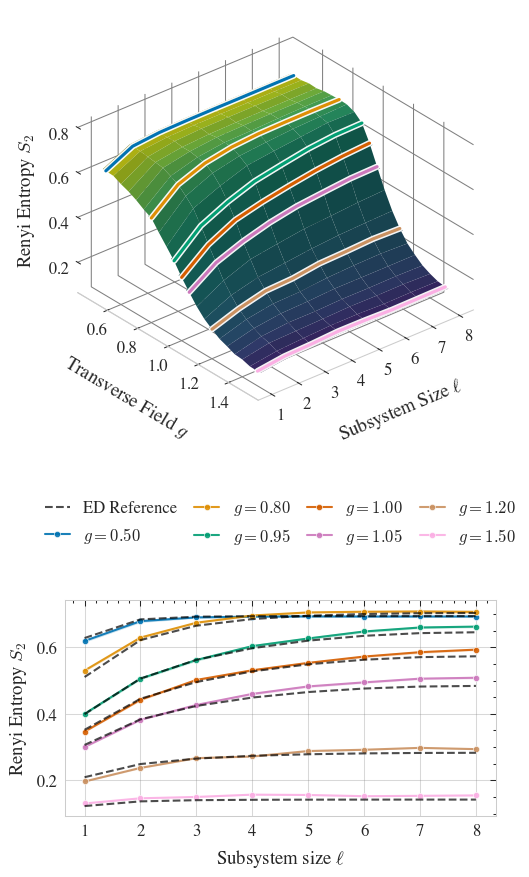

In [29]:
# --- Configuration ---
SAVE_FIG = True
FILENAME = "tfim_4x4_entropy.pdf"
COLUMN_MODE = "single"          # "single" or "double"
SAVE_TIGHT = False              # keep False while tuning

# ==========================================================
# FONT SIZESFont sizes (separate knobs)
# ==========================================================
TEXT_SIZE = 9                   # axis labels + z-label text
TICK_LABEL_SIZE = 8             # tick numbers (2D + 3D)
LEGEND_SIZE = 8                 # legend text (keep like before)
PANEL_LABEL_SIZE = 12           # (kept for compatibility; panel indices removed)

# ==========================================================
# 3D KNOBS
# ==========================================================
THREE_D_RATIO = 2.0
TWO_D_RATIO   = 1.0

# --- NEW: vertical spacing knob between 3D (top) and 2D (bottom) ---
VERTICAL_GAP = 0.50             # larger -> more separation

SHIFT_3D_X = -0.02              # + right, - left

BOX_ASPECT_X = 1.0
BOX_ASPECT_Y = 1.0
BOX_ASPECT_Z = 0.7

XTICK_PAD = -3                  # apply AFTER draw
YTICK_PAD = -3
ZTICK_PAD = -3

X_LABEL_SPACE = 0.0             # smaller -> closer (mplot3d may ignore)
Y_LABEL_SPACE = 0.0
X_LABELPAD = 0                  # points (mplot3d may ignore)
Y_LABELPAD = 0

ZLABEL_X = -0.04                # manual z-label position
ZLABEL_Y = 0.55
ZLABEL_ROT = 90

# ==========================================================
# 2D KNOBS
# ==========================================================
LEGEND_NCOL = 4
LEGEND_ANCHOR = (0.5, 1.22)     # centered ABOVE the 2D axes
LEGEND_LOC = "lower center"

# ==========================================================
# Figure margins
# ==========================================================
LEFT_MARGIN   = 0.16
RIGHT_MARGIN  = 0.98
TOP_MARGIN    = 0.98
BOTTOM_MARGIN = 0.08

FIELD_SYMBOL = "g"              # display-only symbol (data stays named "h")

def _apply_3d_label_spacing(ax, x_space, y_space, x_pad, y_pad):
    ax.xaxis._axinfo["label"]["space_factor"] = x_space
    ax.yaxis._axinfo["label"]["space_factor"] = y_space
    ax.xaxis.labelpad = x_pad
    ax.yaxis.labelpad = y_pad

with plt.rc_context({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white",
    "axes.labelsize": TEXT_SIZE,
    "xtick.labelsize": TICK_LABEL_SIZE,
    "ytick.labelsize": TICK_LABEL_SIZE,
    "legend.fontsize": LEGEND_SIZE,
}):
    width = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
    total_height = 6.0 if COLUMN_MODE == "single" else 5.0

    fig = plt.figure(figsize=(width, total_height), dpi=DPI)
    fig.subplots_adjust(left=LEFT_MARGIN, right=RIGHT_MARGIN, top=TOP_MARGIN, bottom=BOTTOM_MARGIN)

    gs = gridspec.GridSpec(
        2, 1,
        height_ratios=[THREE_D_RATIO, TWO_D_RATIO],
        hspace=VERTICAL_GAP
    )

    # ==========================================
    # 1) 3D SURFACE (Top)
    # ==========================================
    ax3d = fig.add_subplot(gs[0], projection="3d")
    ax3d.set_proj_type("ortho")

    pos = ax3d.get_position()
    ax3d.set_position([pos.x0 + SHIFT_3D_X, pos.y0, pos.width, pos.height])

    ax3d.zaxis._axinfo["juggled"] = (1, 0, 2)

    ax3d.minorticks_off()
    ax3d.xaxis.set_minor_locator(ticker.NullLocator())
    ax3d.yaxis.set_minor_locator(ticker.NullLocator())
    ax3d.zaxis.set_minor_locator(ticker.NullLocator())

    ax3d.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax3d.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax3d.zaxis.set_major_locator(ticker.MultipleLocator(0.2))

    ax3d.set_box_aspect((BOX_ASPECT_X, BOX_ASPECT_Y, BOX_ASPECT_Z))

    grid_style = {"color": "gray", "linewidth": 0.5, "alpha": 0.3}
    for axis in (ax3d.xaxis, ax3d.yaxis, ax3d.zaxis):
        axis._axinfo["grid"].update(grid_style)
        axis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    cmap_surface = plt.get_cmap("viridis")
    norm_h = mcolors.Normalize(vmin=h_dense.min(), vmax=h_dense.max())

    t = norm_h(X_h)
    t = 1.0 - t
    t = 0.10 + 0.85 * t
    surface_colors = cmap_surface(t)

    ax3d.plot_surface(
        X_h, Y_l, Z_s2,
        facecolors=surface_colors,
        rstride=1, cstride=1,
        shade=True, linewidth=0, alpha=1.0, antialiased=True
    )

    ax3d.set_zlim(np.min(Z_s2) - 0.05, np.max(Z_s2) + 0.1)

    ax3d.set_xlabel(f"Transverse Field ${FIELD_SYMBOL}$", fontsize=TEXT_SIZE)
    ax3d.set_ylabel("Subsystem Size $\\ell$", fontsize=TEXT_SIZE)

    ax3d.set_zlabel("")
    zlab = ax3d.text2D(
        ZLABEL_X, ZLABEL_Y, "Renyi Entropy $S_2$",
        transform=ax3d.transAxes,
        rotation=ZLABEL_ROT, va="center", ha="right",
        fontsize=TEXT_SIZE,
        clip_on=False
    )

    ax3d.view_init(elev=30, azim=-40)

    _apply_3d_label_spacing(ax3d, X_LABEL_SPACE, Y_LABEL_SPACE, X_LABELPAD, Y_LABELPAD)
    fig.canvas.draw()
    _apply_3d_label_spacing(ax3d, X_LABEL_SPACE, Y_LABEL_SPACE, X_LABELPAD, Y_LABELPAD)
    fig.canvas.draw()

    for tck in ax3d.xaxis.get_major_ticks():
        tck.set_pad(XTICK_PAD)
    for tck in ax3d.yaxis.get_major_ticks():
        tck.set_pad(YTICK_PAD)
    for tck in ax3d.zaxis.get_major_ticks():
        tck.set_pad(ZTICK_PAD)

    for lab in ax3d.get_xticklabels() + ax3d.get_yticklabels() + ax3d.get_zticklabels():
        lab.set_clip_on(False)
        lab.set_fontsize(TICK_LABEL_SIZE)

    fig.canvas.draw()

    # ==========================================
    # 2) 2D CUTS (Bottom)
    # ==========================================
    ax2d = fig.add_subplot(gs[1])

    import seaborn as sns
    palette_2d = sns.color_palette("colorblind", n_colors=max(10, len(support_h_keys)))

    ref_label_added = False
    H_RIBBON_PAD = 0.02

    for i, h in enumerate(support_h_keys):
        subset = df_res[df_res["h"] == h].sort_values("l")
        s2_vals = subset["s2"].values
        err_vals = subset["s2_err"].values
        color = palette_2d[i % len(palette_2d)]
        h0 = float(h)

        h_left  = h0 - H_RIBBON_PAD
        h_right = h0 + H_RIBBON_PAD

        X_rib = np.vstack([
            np.full_like(l_values, h_left, dtype=float),
            np.full_like(l_values, h_right, dtype=float),
        ])
        Y_rib = np.vstack([l_values, l_values])
        Z_rib = np.vstack([s2_vals, s2_vals])

        t0 = 1.0 - norm_h(h0)
        t0 = 0.10 + 0.85 * t0
        rib_color = cmap_surface(t0)

        ax3d.plot_surface(
            X_rib, Y_rib, Z_rib,
            color=rib_color, shade=True, linewidth=0, alpha=1.0, antialiased=True
        )

        xline = np.full_like(l_values, h0, dtype=float)

        ax3d.plot(
            xline, l_values, s2_vals,
            color="white", linestyle="-", linewidth=3.0, alpha=0.95,
            solid_capstyle="round", solid_joinstyle="round", zorder=19
        )
        ax3d.plot(
            xline, l_values, s2_vals,
            color=color, linestyle="-", linewidth=1.5, alpha=1.0,
            solid_capstyle="round", solid_joinstyle="round", zorder=20
        )

        if not ref_df_2.empty:
            mask = np.isclose(ref_df_2["h"].values, h0, atol=1e-6)
            if mask.any():
                row = ref_df_2.loc[mask].iloc[0]
                x_ref, y_ref = [], []
                for c in ref_df_2.columns:
                    if c.startswith("l"):
                        ell = int(c[1:])
                        if ell in l_values:
                            x_ref.append(ell)
                            y_ref.append(row[c])

                lbl = ref_style["label"] if not ref_label_added else "_nolegend_"
                style_kwargs = ref_style.copy()
                style_kwargs["label"] = lbl
                ax2d.plot(x_ref, y_ref, **style_kwargs, zorder=5)
                ref_label_added = True

        ax2d.plot(
            l_values, s2_vals,
            marker="o", linestyle="-", color=color, markersize=3,
            linewidth=1.0, alpha=0.9,
            markeredgecolor="white", markeredgewidth=0.3,
            label=f"${FIELD_SYMBOL}={h0:.2f}$",
            zorder=4
        )
        ax2d.fill_between(
            l_values, s2_vals - err_vals, s2_vals + err_vals,
            color=color, alpha=0.2, linewidth=0
        )

    ax2d.set_xlabel("Subsystem size $\\ell$", fontsize=TEXT_SIZE)
    ax2d.set_ylabel("Renyi Entropy $S_2$", fontsize=TEXT_SIZE)
    ax2d.grid(True, which="major", alpha=0.3, color="gray", linewidth=0.5)

    for lab in ax2d.get_xticklabels() + ax2d.get_yticklabels():
        lab.set_fontsize(TICK_LABEL_SIZE)

    leg = ax2d.legend(
        frameon=False,
        fontsize=LEGEND_SIZE,
        ncol=LEGEND_NCOL,
        loc=LEGEND_LOC,
        bbox_to_anchor=LEGEND_ANCHOR,
        columnspacing=1.0,
        handlelength=1.5,
        borderaxespad=0.0
    )

    if SAVE_FIG:
        if SAVE_TIGHT:
            plt.savefig(FILENAME, bbox_inches="tight", pad_inches=0.02, bbox_extra_artists=[zlab, leg])
        else:
            plt.savefig(FILENAME)
        print(f"Saved: {FILENAME}")

    plt.show()


Saved: tfim_4x4_entropy.pdf


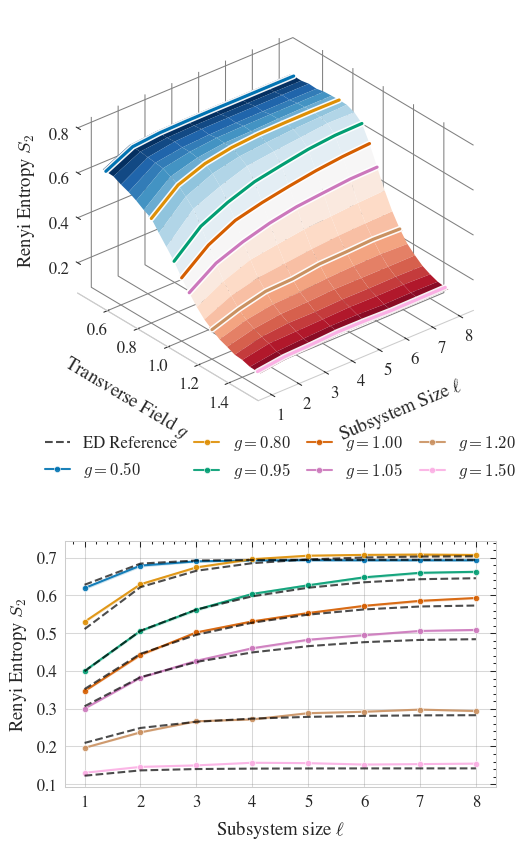

In [26]:
# --- Configuration ---
SAVE_FIG = True
FILENAME = "tfim_4x4_entropy.pdf"
COLUMN_MODE = "single"          # "single" or "double"
SAVE_TIGHT = False              # keep False while tuning

# ==========================================================
# FONT SIZES (separate knobs)
# ==========================================================
TEXT_SIZE = 9                   # axis labels + z-label text
TICK_LABEL_SIZE = 8             # tick numbers (2D + 3D)
LEGEND_SIZE = 8                 # legend text
PANEL_LABEL_SIZE = 12           # unused (panel indices removed)

# ==========================================================
# 3D KNOBS
# ==========================================================
THREE_D_RATIO = 2.0
TWO_D_RATIO   = 1.0
VERTICAL_GAP  = 0.20            # vertical spacing between top/bottom panels

SHIFT_3D_X = -0.02              # + right, - left

BOX_ASPECT_X = 1.0
BOX_ASPECT_Y = 1.0
BOX_ASPECT_Z = 0.7

XTICK_PAD = -3                  # apply AFTER draw
YTICK_PAD = -3
ZTICK_PAD = -3

X_LABEL_SPACE = 0.0             # mplot3d may ignore
Y_LABEL_SPACE = 0.0
X_LABELPAD = 0
Y_LABELPAD = 0

ZLABEL_X = -0.04                # manual z-label position
ZLABEL_Y = 0.55
ZLABEL_ROT = 90

# --- NEW: Diverging colormap settings for 3D surface ---
DIVERGING_CMAP = "RdBu_r"        # blue-white-red
GC_WHITE = 1.00                  # where you want the neutral white band (e.g., critical field)

# ==========================================================
# 2D KNOBS
# ==========================================================
LEGEND_NCOL = 4
LEGEND_ANCHOR = (0.5, 1.22)     # centered ABOVE the 2D axes
LEGEND_LOC = "lower center"

# ==========================================================
# Figure margins
# ==========================================================
LEFT_MARGIN   = 0.16
RIGHT_MARGIN  = 0.98
TOP_MARGIN    = 0.98
BOTTOM_MARGIN = 0.08

FIELD_SYMBOL = "g"              # display-only symbol (data stays named "h")

def _apply_3d_label_spacing(ax, x_space, y_space, x_pad, y_pad):
    ax.xaxis._axinfo["label"]["space_factor"] = x_space
    ax.yaxis._axinfo["label"]["space_factor"] = y_space
    ax.xaxis.labelpad = x_pad
    ax.yaxis.labelpad = y_pad

with plt.rc_context({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white",
    "axes.labelsize": TEXT_SIZE,
    "xtick.labelsize": TICK_LABEL_SIZE,
    "ytick.labelsize": TICK_LABEL_SIZE,
    "legend.fontsize": LEGEND_SIZE,
}):
    width = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
    total_height = 6.0 if COLUMN_MODE == "single" else 5.0

    fig = plt.figure(figsize=(width, total_height), dpi=DPI)
    fig.subplots_adjust(left=LEFT_MARGIN, right=RIGHT_MARGIN, top=TOP_MARGIN, bottom=BOTTOM_MARGIN)

    gs = gridspec.GridSpec(
        2, 1,
        height_ratios=[THREE_D_RATIO, TWO_D_RATIO],
        hspace=VERTICAL_GAP
    )

    # ==========================================
    # 1) 3D SURFACE (Top)
    # ==========================================
    ax3d = fig.add_subplot(gs[0], projection="3d")
    ax3d.set_proj_type("ortho")

    pos = ax3d.get_position()
    ax3d.set_position([pos.x0 + SHIFT_3D_X, pos.y0, pos.width, pos.height])

    ax3d.zaxis._axinfo["juggled"] = (1, 0, 2)

    ax3d.minorticks_off()
    ax3d.xaxis.set_minor_locator(ticker.NullLocator())
    ax3d.yaxis.set_minor_locator(ticker.NullLocator())
    ax3d.zaxis.set_minor_locator(ticker.NullLocator())

    ax3d.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax3d.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax3d.zaxis.set_major_locator(ticker.MultipleLocator(0.2))

    ax3d.set_box_aspect((BOX_ASPECT_X, BOX_ASPECT_Y, BOX_ASPECT_Z))

    grid_style = {"color": "gray", "linewidth": 0.5, "alpha": 0.3}
    for axis in (ax3d.xaxis, ax3d.yaxis, ax3d.zaxis):
        axis._axinfo["grid"].update(grid_style)
        axis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    # --- Diverging colormap with a true white midpoint at GC_WHITE ---
    cmap_surface = plt.get_cmap(DIVERGING_CMAP)
    norm_h = mcolors.TwoSlopeNorm(vmin=h_dense.min(), vcenter=GC_WHITE, vmax=h_dense.max())

    t = norm_h(X_h)                 # no inversion, no compression
    surface_colors = cmap_surface(t)

    ax3d.plot_surface(
        X_h, Y_l, Z_s2,
        facecolors=surface_colors,
        rstride=1, cstride=1,
        shade=False,                # IMPORTANT: avoid lighting turning white -> gray
        linewidth=0,
        alpha=1.0,
        antialiased=True
    )

    ax3d.set_zlim(np.min(Z_s2) - 0.05, np.max(Z_s2) + 0.1)

    ax3d.set_xlabel(f"Transverse Field ${FIELD_SYMBOL}$", fontsize=TEXT_SIZE)
    ax3d.set_ylabel("Subsystem Size $\\ell$", fontsize=TEXT_SIZE)

    ax3d.set_zlabel("")
    zlab = ax3d.text2D(
        ZLABEL_X, ZLABEL_Y, "Renyi Entropy $S_2$",
        transform=ax3d.transAxes,
        rotation=ZLABEL_ROT, va="center", ha="right",
        fontsize=TEXT_SIZE,
        clip_on=False
    )

    ax3d.view_init(elev=30, azim=-40)

    _apply_3d_label_spacing(ax3d, X_LABEL_SPACE, Y_LABEL_SPACE, X_LABELPAD, Y_LABELPAD)
    fig.canvas.draw()
    _apply_3d_label_spacing(ax3d, X_LABEL_SPACE, Y_LABEL_SPACE, X_LABELPAD, Y_LABELPAD)
    fig.canvas.draw()

    for tck in ax3d.xaxis.get_major_ticks():
        tck.set_pad(XTICK_PAD)
    for tck in ax3d.yaxis.get_major_ticks():
        tck.set_pad(YTICK_PAD)
    for tck in ax3d.zaxis.get_major_ticks():
        tck.set_pad(ZTICK_PAD)

    for lab in ax3d.get_xticklabels() + ax3d.get_yticklabels() + ax3d.get_zticklabels():
        lab.set_clip_on(False)
        lab.set_fontsize(TICK_LABEL_SIZE)

    fig.canvas.draw()

    # ==========================================
    # 2) 2D CUTS (Bottom)
    # ==========================================
    ax2d = fig.add_subplot(gs[1])

    import seaborn as sns
    palette_2d = sns.color_palette("colorblind", n_colors=max(10, len(support_h_keys)))

    ref_label_added = False
    H_RIBBON_PAD = 0.02

    for i, h in enumerate(support_h_keys):
        subset = df_res[df_res["h"] == h].sort_values("l")
        s2_vals = subset["s2"].values
        err_vals = subset["s2_err"].values
        color = palette_2d[i % len(palette_2d)]
        h0 = float(h)

        h_left  = h0 - H_RIBBON_PAD
        h_right = h0 + H_RIBBON_PAD

        X_rib = np.vstack([
            np.full_like(l_values, h_left, dtype=float),
            np.full_like(l_values, h_right, dtype=float),
        ])
        Y_rib = np.vstack([l_values, l_values])
        Z_rib = np.vstack([s2_vals, s2_vals])

        rib_color = cmap_surface(norm_h(h0))  # matches the 3D surface coloring

        ax3d.plot_surface(
            X_rib, Y_rib, Z_rib,
            color=rib_color,
            shade=False,            # IMPORTANT for true colormap colors
            linewidth=0,
            alpha=1.0,
            antialiased=True
        )

        xline = np.full_like(l_values, h0, dtype=float)

        ax3d.plot(
            xline, l_values, s2_vals,
            color="white", linestyle="-", linewidth=3.0, alpha=0.95,
            solid_capstyle="round", solid_joinstyle="round", zorder=19
        )
        ax3d.plot(
            xline, l_values, s2_vals,
            color=color, linestyle="-", linewidth=1.5, alpha=1.0,
            solid_capstyle="round", solid_joinstyle="round", zorder=20
        )

        if not ref_df_2.empty:
            mask = np.isclose(ref_df_2["h"].values, h0, atol=1e-6)
            if mask.any():
                row = ref_df_2.loc[mask].iloc[0]
                x_ref, y_ref = [], []
                for c in ref_df_2.columns:
                    if c.startswith("l"):
                        ell = int(c[1:])
                        if ell in l_values:
                            x_ref.append(ell)
                            y_ref.append(row[c])

                lbl = ref_style["label"] if not ref_label_added else "_nolegend_"
                style_kwargs = ref_style.copy()
                style_kwargs["label"] = lbl
                ax2d.plot(x_ref, y_ref, **style_kwargs, zorder=5)
                ref_label_added = True

        ax2d.plot(
            l_values, s2_vals,
            marker="o", linestyle="-", color=color, markersize=3,
            linewidth=1.0, alpha=0.9,
            markeredgecolor="white", markeredgewidth=0.3,
            label=f"${FIELD_SYMBOL}={h0:.2f}$",
            zorder=4
        )
        ax2d.fill_between(
            l_values, s2_vals - err_vals, s2_vals + err_vals,
            color=color, alpha=0.2, linewidth=0
        )

    ax2d.set_xlabel("Subsystem size $\\ell$", fontsize=TEXT_SIZE)
    ax2d.set_ylabel("Renyi Entropy $S_2$", fontsize=TEXT_SIZE)
    ax2d.grid(True, which="major", alpha=0.3, color="gray", linewidth=0.5)

    for lab in ax2d.get_xticklabels() + ax2d.get_yticklabels():
        lab.set_fontsize(TICK_LABEL_SIZE)

    leg = ax2d.legend(
        frameon=False,
        fontsize=LEGEND_SIZE,
        ncol=LEGEND_NCOL,
        loc=LEGEND_LOC,
        bbox_to_anchor=LEGEND_ANCHOR,
        columnspacing=1.0,
        handlelength=1.5,
        borderaxespad=0.0
    )

    if SAVE_FIG:
        if SAVE_TIGHT:
            plt.savefig(FILENAME, bbox_inches="tight", pad_inches=0.02, bbox_extra_artists=[zlab, leg])
        else:
            plt.savefig(FILENAME)
        print(f"Saved: {FILENAME}")

    plt.show()


Saved: tfim_4x4_entropy.pdf


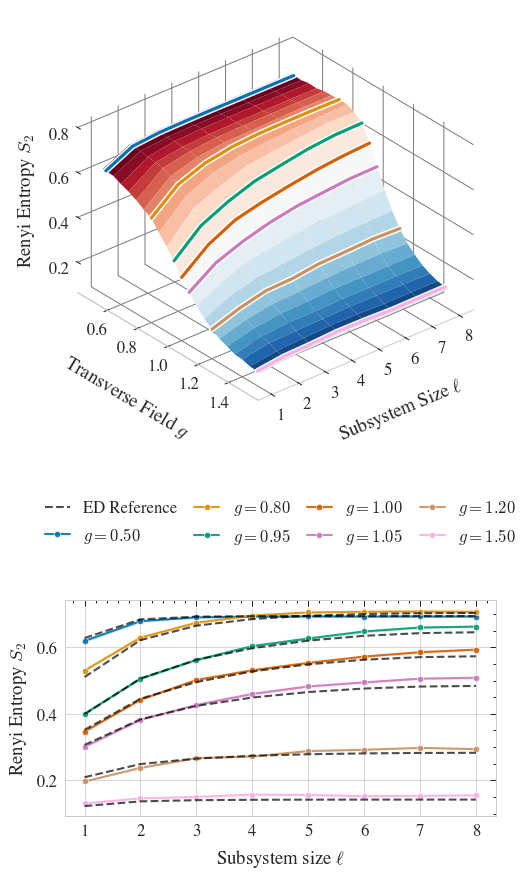

In [28]:
# --- Configuration ---
SAVE_FIG = True
FILENAME = "tfim_4x4_entropy.pdf"
COLUMN_MODE = "single"          # "single" or "double"
SAVE_TIGHT = False              # keep False while tuning

# ==========================================================
# FONT SIZES (separate knobs)
# ==========================================================
TEXT_SIZE = 9                   # axis labels + z-label text
TICK_LABEL_SIZE = 8             # tick numbers (2D + 3D)
LEGEND_SIZE = 8                 # legend text

# ==========================================================
# 3D KNOBS
# ==========================================================
THREE_D_RATIO = 2.0
TWO_D_RATIO   = 1.0
VERTICAL_GAP  = 0.50            # inter-figure distance (top/bottom)

SHIFT_3D_X = -0.02              # + right, - left

BOX_ASPECT_X = 1.0
BOX_ASPECT_Y = 1.0
BOX_ASPECT_Z = 0.7

XTICK_PAD = -3                  # apply AFTER draw
YTICK_PAD = -3
ZTICK_PAD = -3

X_LABEL_SPACE = 0.0             # mplot3d may ignore
Y_LABEL_SPACE = 0.0
X_LABELPAD = 0
Y_LABELPAD = 0

ZLABEL_X = -0.04                # manual z-label position
ZLABEL_Y = 0.55
ZLABEL_ROT = 90

# --- Diverging colormap settings for 3D surface ---
DIVERGING_CMAP = "RdBu"         # flipped vs RdBu_r (blue<->red)
GC_WHITE = 1.00                 # where you want the neutral white band

# ==========================================================
# 2D KNOBS
# ==========================================================
LEGEND_NCOL = 4
LEGEND_ANCHOR = (0.5, 1.22)     # centered ABOVE the 2D axes
LEGEND_LOC = "lower center"

# ==========================================================
# Figure margins
# ==========================================================
LEFT_MARGIN   = 0.16
RIGHT_MARGIN  = 0.98
TOP_MARGIN    = 0.98
BOTTOM_MARGIN = 0.08

FIELD_SYMBOL = "g"              # display-only symbol (data stays named "h")

def _apply_3d_label_spacing(ax, x_space, y_space, x_pad, y_pad):
    ax.xaxis._axinfo["label"]["space_factor"] = x_space
    ax.yaxis._axinfo["label"]["space_factor"] = y_space
    ax.xaxis.labelpad = x_pad
    ax.yaxis.labelpad = y_pad

with plt.rc_context({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white",
    "axes.labelsize": TEXT_SIZE,
    "xtick.labelsize": TICK_LABEL_SIZE,
    "ytick.labelsize": TICK_LABEL_SIZE,
    "legend.fontsize": LEGEND_SIZE,
}):
    width = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
    total_height = 6.0 if COLUMN_MODE == "single" else 5.0

    fig = plt.figure(figsize=(width, total_height), dpi=DPI)
    fig.subplots_adjust(left=LEFT_MARGIN, right=RIGHT_MARGIN, top=TOP_MARGIN, bottom=BOTTOM_MARGIN)

    gs = gridspec.GridSpec(
        2, 1,
        height_ratios=[THREE_D_RATIO, TWO_D_RATIO],
        hspace=VERTICAL_GAP
    )

    # ==========================================
    # 1) 3D SURFACE (Top)
    # ==========================================
    ax3d = fig.add_subplot(gs[0], projection="3d")
    ax3d.set_proj_type("ortho")

    pos = ax3d.get_position()
    ax3d.set_position([pos.x0 + SHIFT_3D_X, pos.y0, pos.width, pos.height])

    ax3d.zaxis._axinfo["juggled"] = (1, 0, 2)

    ax3d.minorticks_off()
    ax3d.xaxis.set_minor_locator(ticker.NullLocator())
    ax3d.yaxis.set_minor_locator(ticker.NullLocator())
    ax3d.zaxis.set_minor_locator(ticker.NullLocator())

    ax3d.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax3d.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax3d.zaxis.set_major_locator(ticker.MultipleLocator(0.2))

    ax3d.set_box_aspect((BOX_ASPECT_X, BOX_ASPECT_Y, BOX_ASPECT_Z))

    grid_style = {"color": "gray", "linewidth": 0.5, "alpha": 0.3}
    for axis in (ax3d.xaxis, ax3d.yaxis, ax3d.zaxis):
        axis._axinfo["grid"].update(grid_style)
        axis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    # --- Diverging colormap with a true white midpoint at GC_WHITE (FLIPPED direction) ---
    cmap_surface = plt.get_cmap(DIVERGING_CMAP)  # "RdBu" instead of "RdBu_r"
    norm_h = mcolors.TwoSlopeNorm(vmin=h_dense.min(), vcenter=GC_WHITE, vmax=h_dense.max())

    t = norm_h(X_h)
    surface_colors = cmap_surface(t)

    ax3d.plot_surface(
        X_h, Y_l, Z_s2,
        facecolors=surface_colors,
        rstride=1, cstride=1,
        shade=False,
        linewidth=0,
        alpha=1.0,
        antialiased=True
    )

    ax3d.set_zlim(np.min(Z_s2) - 0.05, np.max(Z_s2) + 0.1)

    ax3d.set_xlabel(f"Transverse Field ${FIELD_SYMBOL}$", fontsize=TEXT_SIZE)
    ax3d.set_ylabel("Subsystem Size $\\ell$", fontsize=TEXT_SIZE)

    ax3d.set_zlabel("")
    zlab = ax3d.text2D(
        ZLABEL_X, ZLABEL_Y, "Renyi Entropy $S_2$",
        transform=ax3d.transAxes,
        rotation=ZLABEL_ROT, va="center", ha="right",
        fontsize=TEXT_SIZE,
        clip_on=False
    )

    ax3d.view_init(elev=30, azim=-40)

    _apply_3d_label_spacing(ax3d, X_LABEL_SPACE, Y_LABEL_SPACE, X_LABELPAD, Y_LABELPAD)
    fig.canvas.draw()
    _apply_3d_label_spacing(ax3d, X_LABEL_SPACE, Y_LABEL_SPACE, X_LABELPAD, Y_LABELPAD)
    fig.canvas.draw()

    for tck in ax3d.xaxis.get_major_ticks():
        tck.set_pad(XTICK_PAD)
    for tck in ax3d.yaxis.get_major_ticks():
        tck.set_pad(YTICK_PAD)
    for tck in ax3d.zaxis.get_major_ticks():
        tck.set_pad(ZTICK_PAD)

    for lab in ax3d.get_xticklabels() + ax3d.get_yticklabels() + ax3d.get_zticklabels():
        lab.set_clip_on(False)
        lab.set_fontsize(TICK_LABEL_SIZE)

    fig.canvas.draw()

    # ==========================================
    # 2) 2D CUTS (Bottom)
    # ==========================================
    ax2d = fig.add_subplot(gs[1])

    import seaborn as sns
    palette_2d = sns.color_palette("colorblind", n_colors=max(10, len(support_h_keys)))

    ref_label_added = False
    H_RIBBON_PAD = 0.02

    for i, h in enumerate(support_h_keys):
        subset = df_res[df_res["h"] == h].sort_values("l")
        s2_vals = subset["s2"].values
        err_vals = subset["s2_err"].values
        color = palette_2d[i % len(palette_2d)]
        h0 = float(h)

        h_left  = h0 - H_RIBBON_PAD
        h_right = h0 + H_RIBBON_PAD

        X_rib = np.vstack([
            np.full_like(l_values, h_left, dtype=float),
            np.full_like(l_values, h_right, dtype=float),
        ])
        Y_rib = np.vstack([l_values, l_values])
        Z_rib = np.vstack([s2_vals, s2_vals])

        rib_color = cmap_surface(norm_h(h0))  # matches flipped surface coloring

        ax3d.plot_surface(
            X_rib, Y_rib, Z_rib,
            color=rib_color,
            shade=False,
            linewidth=0,
            alpha=1.0,
            antialiased=True
        )

        xline = np.full_like(l_values, h0, dtype=float)

        ax3d.plot(
            xline, l_values, s2_vals,
            color="white", linestyle="-", linewidth=3.0, alpha=0.95,
            solid_capstyle="round", solid_joinstyle="round", zorder=19
        )
        ax3d.plot(
            xline, l_values, s2_vals,
            color=color, linestyle="-", linewidth=1.5, alpha=1.0,
            solid_capstyle="round", solid_joinstyle="round", zorder=20
        )

        if not ref_df_2.empty:
            mask = np.isclose(ref_df_2["h"].values, h0, atol=1e-6)
            if mask.any():
                row = ref_df_2.loc[mask].iloc[0]
                x_ref, y_ref = [], []
                for c in ref_df_2.columns:
                    if c.startswith("l"):
                        ell = int(c[1:])
                        if ell in l_values:
                            x_ref.append(ell)
                            y_ref.append(row[c])

                lbl = ref_style["label"] if not ref_label_added else "_nolegend_"
                style_kwargs = ref_style.copy()
                style_kwargs["label"] = lbl
                ax2d.plot(x_ref, y_ref, **style_kwargs, zorder=5)
                ref_label_added = True

        ax2d.plot(
            l_values, s2_vals,
            marker="o", linestyle="-", color=color, markersize=3,
            linewidth=1.0, alpha=0.9,
            markeredgecolor="white", markeredgewidth=0.3,
            label=f"${FIELD_SYMBOL}={h0:.2f}$",
            zorder=4
        )
        ax2d.fill_between(
            l_values, s2_vals - err_vals, s2_vals + err_vals,
            color=color, alpha=0.2, linewidth=0
        )

    ax2d.set_xlabel("Subsystem size $\\ell$", fontsize=TEXT_SIZE)
    ax2d.set_ylabel("Renyi Entropy $S_2$", fontsize=TEXT_SIZE)
    ax2d.grid(True, which="major", alpha=0.3, color="gray", linewidth=0.5)

    for lab in ax2d.get_xticklabels() + ax2d.get_yticklabels():
        lab.set_fontsize(TICK_LABEL_SIZE)

    leg = ax2d.legend(
        frameon=False,
        fontsize=LEGEND_SIZE,
        ncol=LEGEND_NCOL,
        loc=LEGEND_LOC,
        bbox_to_anchor=LEGEND_ANCHOR,
        columnspacing=1.0,
        handlelength=1.5,
        borderaxespad=0.0
    )

    if SAVE_FIG:
        if SAVE_TIGHT:
            plt.savefig(FILENAME, bbox_inches="tight", pad_inches=0.02, bbox_extra_artists=[zlab, leg])
        else:
            plt.savefig(FILENAME)
        print(f"Saved: {FILENAME}")

    plt.show()
